In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


function to plot confusion matrix

In [16]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

reading the data

In [17]:
data = pd.read_csv("SpaceX_Data_Cleaned_upsampled.csv")

In [18]:
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,8183.607718,LEO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1.0,False,False,False,1.0,0.0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B1004,-80.577366,28.561857,0



hot-encoding


In [20]:
categorical_cols = ['Orbit', 'Serial', 'GridFins', 'Reused', 'Legs']

df_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

df = df_encoded.drop(['Date', 'BoosterVersion', 'LaunchSite', 'Outcome', 'Longitude', 'Latitude','FlightNumber'], axis=1)



In [24]:
# Select numerical features
numerical_features = ['PayloadMass', 'Flights', 'Block', 'ReusedCount']

# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the transformed DataFrame
df

,PayloadMass,Flights,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,0.270387,-0.663783,-1.612007,-0.805329,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,-1.346296,-0.663783,-1.612007,-0.805329,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,-1.314210,-0.663783,-1.612007,-0.805329,0,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False
3,-1.351573,-0.663783,-1.612007,-0.805329,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4,-0.787953,-0.663783,-1.612007,-0.805329,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.250255,-0.663783,-0.128280,-0.805329,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
270,0.347521,-0.189062,0.481115,-0.503216,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
271,-0.437237,-0.539979,-0.955284,-0.726540,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
272,0.352324,0.205484,0.723666,-0.252127,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False


In [25]:
df.astype(float)

,PayloadMass,Flights,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,0.270387,-0.663783,-1.612007,-0.805329,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.346296,-0.663783,-1.612007,-0.805329,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.314210,-0.663783,-1.612007,-0.805329,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-1.351573,-0.663783,-1.612007,-0.805329,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.787953,-0.663783,-1.612007,-0.805329,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.250255,-0.663783,-0.128280,-0.805329,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
270,0.347521,-0.189062,0.481115,-0.503216,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
271,-0.437237,-0.539979,-0.955284,-0.726540,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
272,0.352324,0.205484,0.723666,-0.252127,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


split between features and target

In [26]:
Y = df["Class"].to_numpy()
df = df.drop(['Class'], axis=1)


split between training and testing data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (219, 85) (219,)
Test set: (55, 85) (55,)


logistic regression

In [28]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters,scoring='accuracy', cv=10)
logreg_cv.fit(X_train, Y_train)
logreg_cv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [29]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9268398268398268


In [30]:
logreg_cv.score(X_test, Y_test)


0.9272727272727272

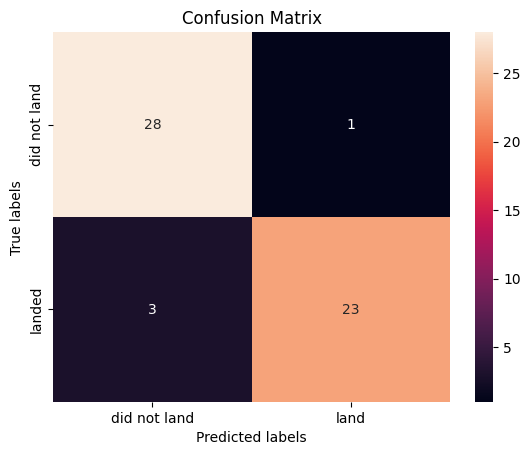

In [31]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

svm

In [32]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [33]:
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters).fit(X_train, Y_train)
svm_cv.fit(X_train, Y_train)
svm_cv.best_params_

{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'poly'}

In [34]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'poly'}
accuracy : 0.9541125541125541


In [35]:
svm_cv.score(X_test, Y_test)

0.9090909090909091

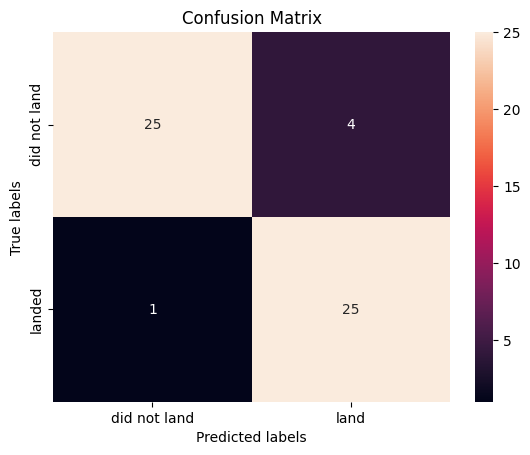

In [36]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

decision tree

In [37]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [38]:
# tree_cv = GridSearchCV(tree, param_grid=parameters,scoring='accuracy', cv=10)
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, Y_train)
tree_cv.fit(X_train, Y_train)
tree_cv.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [40]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9363636363636363


In [41]:
tree_cv.score(X_test, Y_test)


0.9454545454545454

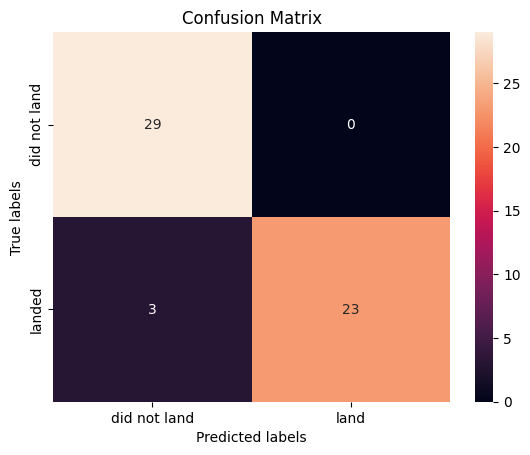

In [42]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

knn

In [43]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [44]:
knn_cv = GridSearchCV(KNN, param_grid=parameters,scoring='accuracy', cv=10)
knn_cv.fit(X_train, Y_train)
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}

In [45]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.9218614718614718


In [46]:
knn_cv.score(X_test, Y_test)

0.8909090909090909

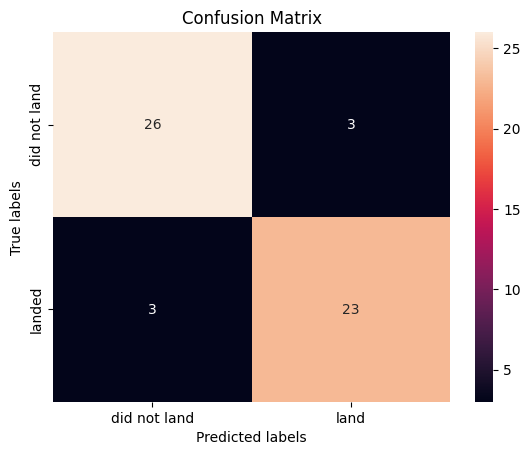

In [47]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [51]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.9636363636363636

Confusion Matrix:
 [[28  1]
 [ 1 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.96      0.96      0.96        26

    accuracy                           0.96        55
   macro avg       0.96      0.96      0.96        55
weighted avg       0.96      0.96      0.96        55



In [56]:
models = {'KNeighbors':knn_cv.best_score_,
              'DecisionTree':tree_cv.best_score_,
              'LogisticRegression':logreg_cv.best_score_,
              'SupportVector': svm_cv.best_score_}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_cv.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
if bestalgorithm == 'SupportVector':
    print('Best params is :', svm_cv.best_params_)

Best model is SupportVector with a score of 0.9541125541125541
Best params is : {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'poly'}
